In [1]:
#firstly import all important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset with the helping of the pandas 
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#check column and rows in the dataset
df.shape

(768, 9)

In [4]:
#check number of result in the dependent variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
#checking null value 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

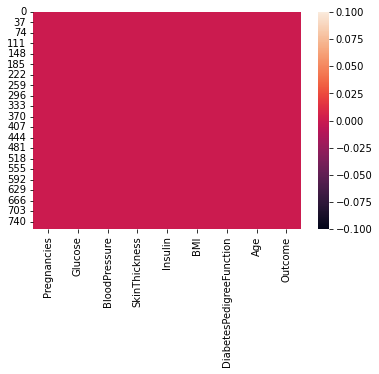

In [6]:
#check null value with graph representaion
sns.heatmap(df.isnull())
plt.show()

In [7]:
#divide dataset into input and output
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#divide dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
#for better performance i convert all the value in the same unit.....use standardscaler
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)    #training data
x_test=ss.transform(x_test)      #testing data

In [11]:
#checking value after applying scaling
x_train

array([[ 3.3536084 ,  0.48047259,  0.05216975, ...,  0.68611992,
        -0.94690147,  0.81020454],
       [-1.12101735, -0.76891126, -0.2463932 , ...,  0.64699564,
         0.39612987, -0.69526203],
       [-0.82270897, -0.16023707,  0.05216975, ..., -0.5788985 ,
        -0.7936697 , -1.02981015],
       ...,
       [ 2.75699163,  0.16011776,  1.04737957, ...,  1.50772982,
         0.34505262,  0.72656751],
       [ 0.07221618,  1.60171451,  0.15169073, ...,  1.53381267,
         0.03258   , -0.611625  ],
       [ 1.5637581 , -0.60873384,  0.3507327 , ...,  0.13837998,
         0.59142526,  1.06111563]])

In [12]:
#create function 
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [13]:
#our data is imbalanced so....our model not train good
#simply we do our data balanced 
from imblearn.over_sampling import RandomOverSampler 
#create object
ros=RandomOverSampler()

In [14]:
#balance the train DATA
x_train,y_train = ros.fit_resample(x_train,y_train)

In [15]:
#balance testing data
x_test,y_test = ros.fit_resample(x_test,y_test)

In [16]:
y_train.value_counts()

1    354
0    354
Name: Outcome, dtype: int64

In [17]:
y_test.value_counts()

0    146
1    146
Name: Outcome, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()

In [19]:
lr = create_model(lr)
#we first focus on precision and recall
#and finally focus on accuracy

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       146
           1       0.82      0.76      0.79       146

    accuracy                           0.79       292
   macro avg       0.80      0.79      0.79       292
weighted avg       0.80      0.79      0.79       292

[[121  25]
 [ 35 111]]


In [20]:
# create a object of class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [21]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       146
           1       0.74      0.71      0.72       146

    accuracy                           0.73       292
   macro avg       0.73      0.73      0.73       292
weighted avg       0.73      0.73      0.73       292

[[110  36]
 [ 43 103]]


In [22]:
dt.feature_importances_
#highest value of any column are most important

array([0.06568499, 0.30308595, 0.09229864, 0.05592955, 0.03002294,
       0.18366026, 0.14684346, 0.12247421])

In [23]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

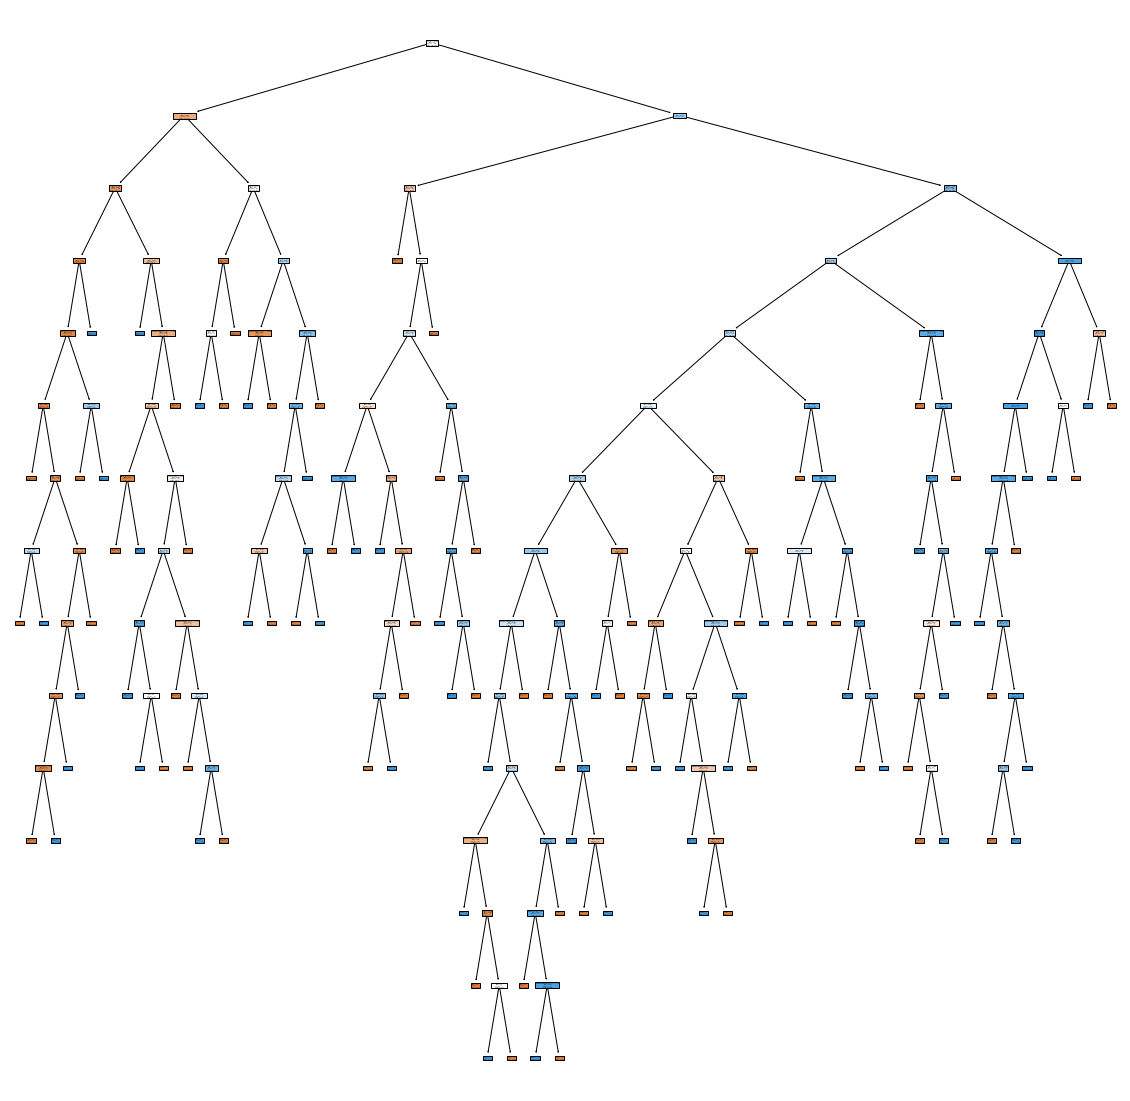

In [24]:
# create a tree
# create the tree

from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [25]:
#here choose max depth 5....means starting 5 attributes are most important for our model
dt1 = DecisionTreeClassifier(max_depth=5)
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       146
           1       0.71      0.82      0.76       146

    accuracy                           0.74       292
   macro avg       0.75      0.74      0.74       292
weighted avg       0.75      0.74      0.74       292

[[ 98  48]
 [ 27 119]]


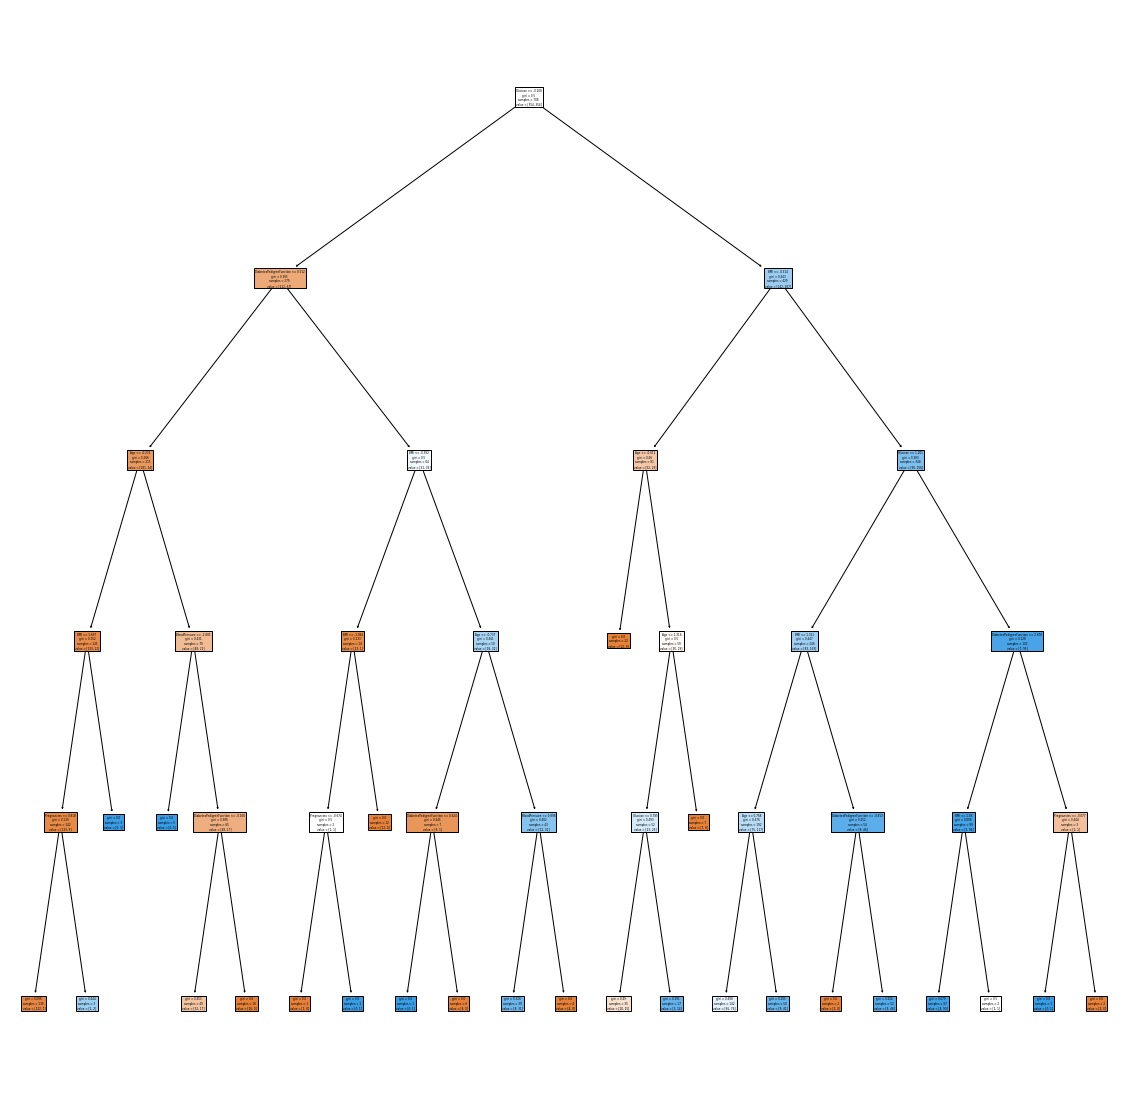

In [51]:
from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [26]:
# create object of DecisionTreeClassifier(min_samples_leaf=50) 

dt2=DecisionTreeClassifier(min_samples_leaf=50)            #by default Gini index method 

# min_samples_leaf =50 or more, means not less than=50

In [27]:
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       146
           1       0.71      0.70      0.71       146

    accuracy                           0.71       292
   macro avg       0.71      0.71      0.71       292
weighted avg       0.71      0.71      0.71       292

[[105  41]
 [ 44 102]]


In [28]:
dt2.feature_importances_

array([0.        , 0.56652382, 0.04124245, 0.01668914, 0.00150651,
       0.18937291, 0.098364  , 0.08630117])

In [29]:
#create object of DecisionTreeClassifier class

dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [30]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       146
           1       0.75      0.70      0.72       146

    accuracy                           0.73       292
   macro avg       0.73      0.73      0.73       292
weighted avg       0.73      0.73      0.73       292

[[112  34]
 [ 44 102]]


In [31]:
#RANDOM FOREST CLASSIFIER
#call random forest tree from package
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Create the object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [33]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.62      0.88      0.73       146
           1       0.79      0.47      0.59       146

    accuracy                           0.67       292
   macro avg       0.71      0.67      0.66       292
weighted avg       0.71      0.67      0.66       292

[[128  18]
 [ 78  68]]


In [34]:
#show important features
rfc.feature_importances_

array([0.0696393 , 0.29332661, 0.08430148, 0.06612896, 0.03786749,
       0.18757835, 0.12618253, 0.13497528])

In [37]:
from sklearn.svm import LinearSVC
#crating object of svm
svm = LinearSVC(random_state=1)

In [38]:
svm = create_model(svm)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       146
           1       0.81      0.73      0.77       146

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292

[[121  25]
 [ 39 107]]


In [40]:
svm1 = LinearSVC(random_state=1,C=0.08)     #c is the external parameter to add error

In [41]:
svm1 = create_model(svm1)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       146
           1       0.81      0.73      0.77       146

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292

[[121  25]
 [ 39 107]]


In [44]:
from sklearn.svm import SVC

In [45]:
#radila basis function
svm2 = SVC(random_state=1,kernel='rbf')

In [46]:
svm2 = create_model(svm2)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       146
           1       0.79      0.77      0.78       146

    accuracy                           0.78       292
   macro avg       0.78      0.78      0.78       292
weighted avg       0.78      0.78      0.78       292

[[116  30]
 [ 34 112]]


# Create predictive system

In [52]:
input_data = (1,85,66,29,0,26.6,0.351,31)

#changing the input data in numpy array
input_data_numpyarray = np.asarray(input_data)

inputdata_reshape = input_data_numpyarray.reshape(1,-1)

#standardize input data
std_data = ss.transform(inputdata_reshape)
print(std_data)

prediction = lr.predict(std_data)
print(prediction)

if prediction==[1]:
    print("Patient has Diabeties")
else:
    print("Patient has NO Diabeties")




[[-0.82270897 -1.15333705 -0.14687221  0.59323809 -0.68822177 -0.68322992
  -0.35200168 -0.19343984]]
[0]
Patient has NO Diabeties
